## PAIR PROGRAMMING LIMPIEZA III

### Valores extremos / Outliers
---

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

pd.options.display.max_columns = None

Antes de seguir, recordamos las preguntas que nos planteamos al principio del pair programming de EDA para dirigir nuestro análisis.

- ¿Es Australia es el sitio más peligroso y letal para estar relajada en la playa?
- ¿Cuál es el rango de edad que sufre la mayoría de los ataques?
- Independientemente de la edad, sufren los hombres más ataques que las mujeres?
- ¿En qué mes ocurren más ataques?
- ¿Cuál es la relación entre la especie y el tipo de ataque (si es fatal o no)?
- ¿Cómo han evolucionado los ataques a lo largo del tiempo?

Actualizamos esta tabla ya que en el ejercicio de pair de Limpieza I y II ya dejamos algunas columnas limpitas:


- age ✔️ la limpiamos en el pair de Limpieza II
- species ✔️ la limpiamos en el pair de Limpieza II
- country ✔️ la limpiamos en el pair de Limpieza II
- fatal ✔️ la limpiamos en el pair de Pandas V
- year ✔️ es una columna de tipo float deberíamos convertirla a integer
- sex ✔️ la limpiamos en el pair de Pandas V
- fecha ✔️ la limpiamos en el pair de Pandas V

Ya hemos limpiado todas las columnas que parecía que no tenían el tipo de dato que queríamos o que tenían demasiada información. Por lo tanto, en este ejercicio tendremos que limpiar los outliers.

In [86]:
df= pd.read_pickle("../files/attacks9.pkl")
df.head(2)

,case_number,year,type,country,activity,date,mes_ataque,fatal,sexo,cat_species,edades
0,1800.00.00,1800,Unprovoked,seychelles,a corsair's boat was overturned,1800,NaN,Y,F,NaN,NaN
1,1797.05.28.R,1797,Unprovoked,NaN,Dropped overboard,Reported May-28-1797,May,Y,NaN,NaN,NaN


**EJERCICIO 1**

¿Sobre qué columnas podremos eliminar o reemplazar los outliers?

In [87]:
# Seleccionamos las columnas numéricas que hay en el DataFrame
df_numericas= df.select_dtypes(include = np.number)
df_numericas

,year,edades
0,1800,NaN
1,1797,NaN
2,1792,NaN
3,1791,NaN
4,1788,NaN
...,...,...
1667,1901,29.0
1668,1894,19.0
1669,1892,21.0
1670,1880,12.0


In [88]:
# Las almacenamos en una lista para usarla en la siguiente función
lista_columnas = list(df_numericas.columns)
lista_columnas

['year', 'edades']

In [89]:
def detectar_outliers(lista_columnas, dataframe): 
    
    '''Función para detectar los outliers del DataFrame.
       Parámetros: lista con las columnas seleccionadas y el DataFrame.
       Return: diccionario con los índices de las filas donde hay outliers'''

    dicc_indices = {}

    for col in lista_columnas:
        
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        print(col)
        display(outliers_data) 
        
        if outliers_data.shape[0] > 0: 
        
            dicc_indices[col] = (list(outliers_data.index))


    return dicc_indices 

In [90]:
# Aplicamos la función guardándolo en la variable indices, en este caso nos devuelve el print con las columnas y el display con las filas que tienen outliers
indices = detectar_outliers(lista_columnas, df)

year


,case_number,year,type,country,activity,date,mes_ataque,fatal,sexo,cat_species,edades
0,1800.00.00,1800,Unprovoked,seychelles,a corsair's boat was overturned,1800,NaN,Y,F,NaN,NaN
1,1797.05.28.R,1797,Unprovoked,NaN,Dropped overboard,Reported May-28-1797,May,Y,NaN,NaN,NaN
2,1792.09.12,1792,Provoked,england,Fishing,12-Sep-1792,Sep,Y,M,NaN,NaN
3,1791.00.00,1791,Unprovoked,australia,NaN,1791,NaN,Y,F,NaN,NaN
4,1788.05.10,1788,Boat,australia,Fishing,10-May-1788,May,N,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
169,ND.0001,0,Unprovoked,ceylon (sri lanka),Swimming,1845-1853,845,Y,M,NaN,15.0
1668,1894.11.28,1894,Unprovoked,australia,Bathing,28-Nov-1894,Nov,N,M,Unspecified,19.0
1669,1892.03.02,1892,Provoked,australia,Fishing,02-Mar-1892,Mar,N,M,Unspecified,21.0
1670,1880.11.25,1880,Unprovoked,australia,Swimming,25-Nov-1880,Nov,Y,M,Bull,12.0


edades


,case_number,year,type,country,activity,date,mes_ataque,fatal,sexo,cat_species,edades
182,2018.03.09.b,2018,Unprovoked,australia,Swimming,9-Mar-2018,Mar,N,M,Unspecified,69.0
200,2017.08.23,2017,Unprovoked,usa,SUP,23-Aug-2017,Aug,N,M,White,69.0
221,2016.11.28,2016,Provoked,australia,Fishing,28-Nov-2016,Nov,N,M,Unspecified,73.0
250,2016.04.09,2016,Unprovoked,new caledonia,Walking,09-Apr-2016,Apr,Y,F,Tiger,69.0
254,2015.12.22,2015,Unprovoked,usa,Paddle boarding,22-Dec-2015,Dec,N,M,Unspecified,71.0
291,2015.07.01,2015,Unprovoked,usa,Swimming,01-Jul-2015,Jul,N,M,Unspecified,68.0
309,2015.04.24.c,2015,Unprovoked,australia,Surf skiing,24-Jun-2015,Jun,N,M,White,71.0
311,2015.04.03,2015,Unprovoked,usa,Spearfishing,03-Apr-2015,Apr,N,M,Bull,70.0
354,2014.03.22.b,2014,Unprovoked,south africa,Swimming,22-Mar-2014,Mar,Y,M,Unspecified,66.0
372,2013.10.11,2013,Unprovoked,south africa,Swimming / snorkeling,11-Oct-2013,Oct,Y,M,White,74.0


    - Las filas sobre las que podemos reemplazar o eliminar los outliers son en dos columnas de tipo numéricas(year, edades).
    - En el caso de 'year' (que tiene 174 outliers) para responder a la última pregunta del análisis no deberíamos eliminar los outliers, pero para otras preguntas si que podríamos separar en otro DataFrame los outliers ya que nos influirían en otros análisis. 
    - En el caso de 'edades' (que tiene 26 outliers) tampoco consideramos eliminarlos para poder tener datos que engloben todas las edades, ya que los outliers son de las personas con mayor edad.

---

**EJERCICIO 2**

Identifica visualmente los outliers

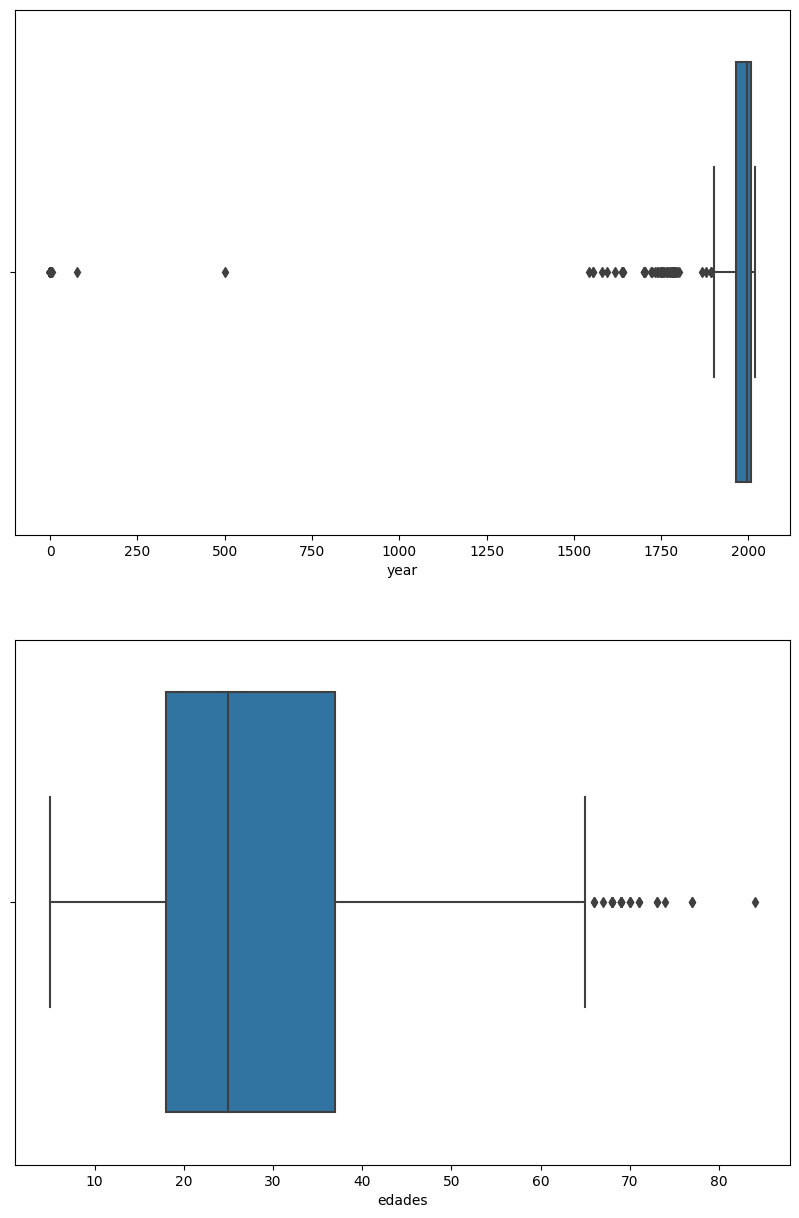

In [91]:
# visualizamos con un boxplot los outliers, iterando con un for loop por las dos columnas numéricas.
fig, ax = plt.subplots(2, 1, figsize=(10,15))

for i, column in enumerate(df_numericas.columns):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

In [92]:
# Calculamos los estadísticos básicos de las dos columnas para reflexionar sobre el dato por el que reemplazaríamos los outliers.
print(f'La media de los años es {df.year.mean()}')
print(f'-----------------------------------------')
print(f'La mediana de los años es {df.year.median()}')
print(f'-----------------------------------------')
print(f'El máximo de los años es {df.year.max()}')
print(f'-----------------------------------------')
print(f'El mínimo de los años es {df.year.min()}')

La media de los años es 1832.6883971291866
-----------------------------------------
La mediana de los años es 1997.0
-----------------------------------------
El máximo de los años es 2018
-----------------------------------------
El mínimo de los años es 0


In [93]:
print(f'La media de las edades es {df.edades.mean()}')
print(f'-----------------------------------------')
print(f'La mediana de las edades es {df.edades.median()}')
print(f'-----------------------------------------')
print(f'El máximo de las edades es {df.edades.max()}')
print(f'-----------------------------------------')
print(f'El mínimo de las edades es {df.edades.min()}')

La media de las edades es 28.660927152317882
-----------------------------------------
La mediana de las edades es 25.0
-----------------------------------------
El máximo de las edades es 84.0
-----------------------------------------
El mínimo de las edades es 5.0


---

**EJERCICIO 3**

Identifica sobre el dataframe las filas que son outliers

In [94]:
# Llamamos a la variable arriba creada que nos devuelve el diccionario donde las keys son los nombres de las columnas y los values los índices de las filas dónde están los outliers.
#indices

---

**EJERCICIO 4**
Reemplaza los outliers por el estadístico más correcto.

In [95]:
# Iteramos por los índices almacenados que contienen las keys(columnas) y values(outliers) para reemplazarlos por la mediana
for k, v in indices.items():
    mediana = df[k].median()
    for i in v:
        df.loc[i,k] = mediana


In [96]:
# Verificamos con los índices en las dos columnas que teníamos outliers, que se han cambiado por la mediana
print(df['edades'].iloc[200,])
print(df['year'].iloc[113,])

25.0
1997


---

Tarea extra para mejorar la columna 'mes' al haber visto en una gráfica del pair EDA_II que todavía no estaba limpia del todo y así guardar el archivo con este cambio.

In [97]:
def mes(col):

    '''Función para detectar el mes dentro de las fechas con patrón regex.
       Parámetros: la columna seleccionada.
       Return: el mes y los valores NaN'''

    patron = '[\s|-](\D{3})[-]'
    try:
        mes = re.findall(patron,col)
        return mes[0]
        
    except: 
        return np.nan

In [98]:
# Aplicamos la función sobre la columna 'date' y guardamos la nueva categoría en la columna 'mes'
df['mes'] = df['date'].apply(mes)

In [99]:
# Comprobamos que los valores son solo los meses y los nulos 
df.mes.unique()

array([nan, 'May', 'Sep', 'Jul', 'Aug', 'Dec', 'Mar', 'Oct', 'Apr', 'Jan',
       'Jun', 'Feb', 'Nov'], dtype=object)

In [100]:
# Borramos las columnas por tener la información mejor categorizada en otras
df.drop(['date', 'mes_ataque'], axis=1, inplace=True)

In [101]:
df.head()

,case_number,year,type,country,activity,fatal,sexo,cat_species,edades,mes
0,1800.00.00,1997,Unprovoked,seychelles,a corsair's boat was overturned,Y,F,NaN,NaN,NaN
1,1797.05.28.R,1997,Unprovoked,NaN,Dropped overboard,Y,NaN,NaN,NaN,May
2,1792.09.12,1997,Provoked,england,Fishing,Y,M,NaN,NaN,Sep
3,1791.00.00,1997,Unprovoked,australia,NaN,Y,F,NaN,NaN,NaN
4,1788.05.10,1997,Boat,australia,Fishing,N,NaN,NaN,NaN,May


In [102]:
# Lista con el nuevo orden de las columnas del dataframe
nuevo_orden= ['case_number', 'year', 'mes','sexo','edades','country','type', 'activity','fatal','cat_species']
 

In [103]:
df2=df.reindex(columns = nuevo_orden)

In [104]:
df2.head()

,case_number,year,mes,sexo,edades,country,type,activity,fatal,cat_species
0,1800.00.00,1997,NaN,F,NaN,seychelles,Unprovoked,a corsair's boat was overturned,Y,NaN
1,1797.05.28.R,1997,May,NaN,NaN,NaN,Unprovoked,Dropped overboard,Y,NaN
2,1792.09.12,1997,Sep,M,NaN,england,Provoked,Fishing,Y,NaN
3,1791.00.00,1997,NaN,F,NaN,australia,Unprovoked,NaN,Y,NaN
4,1788.05.10,1997,May,NaN,NaN,australia,Boat,Fishing,N,NaN


---

**EJERCICIO 5**

Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza.

In [105]:
df2.to_pickle('../files/attacks10.pkl')